In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
data = pd.read_parquet('../data/processed/PurpleAir daily individual.parquet')[['Channel A PM2.5 (ug/m3)']]

In [7]:
def prettify_dates(df, column='created_at', fmt='%m-%d'):
    """ Transform datetime column to column of string-formatted dates """
    df[column] = df[column].dt.strftime('%m-%d')
    for i, value in enumerate(df[column]):
        df.loc[i, 'created_at'] = value.lstrip("0").replace(" 0", " ")
    return df

def truncate_sensor_name(df):
    """ Remove PA_II_ from sensor name"""
    for i, value in enumerate(df['sensor_name']):
        df.loc[i, 'sensor_name'] = value.replace("PA_II_", "")
    return df

def pivot_data_heatmap(df):
    return df.pivot(index='created_at',columns='sensor_name', values='Channel A PM2.5 (ug/m3)')

data_by_sensor = pivot_data_heatmap(truncate_sensor_name(prettify_dates(data.reset_index())))

In [8]:
def AQI_cmap():
    colors = ['green', 
          'green',
          'yellowgreen', 
          'yellow', 
          'orange', 
          'orangered', 
          'red',
          'purple', 
          'purple']
    nodes = [0, 
         6/350, #green midpt
         12/350, # boundary 
         24/350, # yellow midpt 
         45/350, # orange midpt
         55/350, # boundary
         103/350, # red midpt
         250/350, # purple midpt
         350/350]
    cmap = LinearSegmentedColormap.from_list("mycmap",list(zip(nodes, colors)))
    return cmap

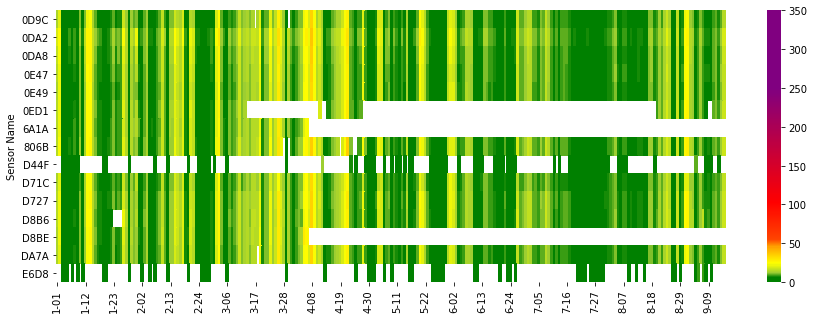

In [8]:
# Make the heatmap
fig, ax = plt.subplots(1,1)
sns.heatmap(data_by_sensor.T, cmap=AQI_cmap(), vmin=0,vmax=350)

fig.set_size_inches(15,5)
ax.set_xlabel('')
ax.set_ylabel('Sensor Name')

def export():
    plt.savefig('PA_Heatmap.jpg', transparent=False, dpi=600)

In [14]:
# Percent data present
((260*15)-sum(data_by_sensor.isna().sum()))/(260*15)

0.78